In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [55]:
df[['Pclass','Sex','Age','Survived','Ticket']]

,Pclass,Sex,Age,Survived,Ticket
0,3,male,22.0,0,A/5 21171
1,1,female,38.0,1,PC 17599
2,3,female,26.0,1,STON/O2. 3101282
3,1,female,35.0,1,113803
4,3,male,35.0,0,373450
...,...,...,...,...,...
886,2,male,27.0,0,211536
887,1,female,19.0,1,112053
888,3,female,NaN,0,W./C. 6607
889,1,male,26.0,1,111369


In [58]:
df[['Pclass','Sex','Age','Survived','Ticket']].count()

Pclass      891
Sex         891
Age         714
Survived    891
Ticket      891
dtype: int64

In [46]:
#make pivot table
df_pivot=df.pivot(index='Sex',columns='Name' ,values='Survived')
df_pivot.T


Sex,female,male
Name,,
"Abbing, Mr. Anthony",NaN,0.0
"Abbott, Mr. Rossmore Edward",NaN,0.0
"Abbott, Mrs. Stanton (Rosa Hunt)",1.0,NaN
"Abelson, Mr. Samuel",NaN,0.0
"Abelson, Mrs. Samuel (Hannah Wizosky)",1.0,NaN
...,...,...
"de Mulder, Mr. Theodore",NaN,1.0
"de Pelsmaeker, Mr. Alfons",NaN,0.0
"del Carlo, Mr. Sebastiano",NaN,0.0


PROBABLITY FOR SURVIVAL BASED ON GENDER


In [59]:
pivot=df.pivot_table(index='Sex',values='Ticket',  aggfunc="count")
pivot

,Ticket
Sex,
female,314
male,577


In [9]:
pivot=df.pivot_table(index='Sex',values='Survived',  aggfunc="sum")
pivot

,Survived
Sex,
female,233
male,109


In [31]:

total_survived = pivot['Survived'].sum()
pivot['Survival Probability'] = (pivot['Survived'] / total_survived)*100

In [32]:
pivot

,Survived,Survival Probability
Sex,,
female,233,68.128655
male,109,31.871345


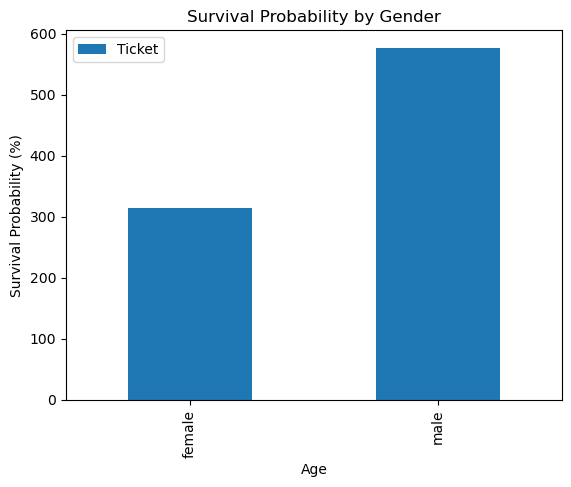

In [78]:
pivot.plot(kind="bar")
plt.title('Survival Probability by Gender')
plt.xlabel('Age')
plt.ylabel('Survival Probability (%)')
plt.show()

PROBABLITY FOR SURVIVAL BASED ON AGE


In [51]:
pivot=df.pivot_table(index='Age',values='Ticket',  aggfunc="count")
pivot.T

Age,0.42,0.67,0.75,0.83,0.92,1.00,2.00,3.00,4.00,5.00,...,62.00,63.00,64.00,65.00,66.00,70.00,70.50,71.00,74.00,80.00
Ticket,1,1,2,2,1,7,10,6,10,4,...,4,2,2,3,1,2,1,2,1,1


In [72]:
pivot_age = df.pivot_table(index='Age', values='Survived', aggfunc='sum')

In [74]:
pivot_age['Survival Probability'] =(pivot_age['Survived'] / total_survived_age)*100
pivot_age = pivot_age.reset_index()
pivot_age

,Age,Survived,Survival Probability
0,0.42,1,0.292398
1,0.67,1,0.292398
2,0.75,2,0.584795
3,0.83,2,0.584795
4,0.92,1,0.292398
...,...,...,...
83,70.00,0,0.000000
84,70.50,0,0.000000
85,71.00,0,0.000000
86,74.00,0,0.000000


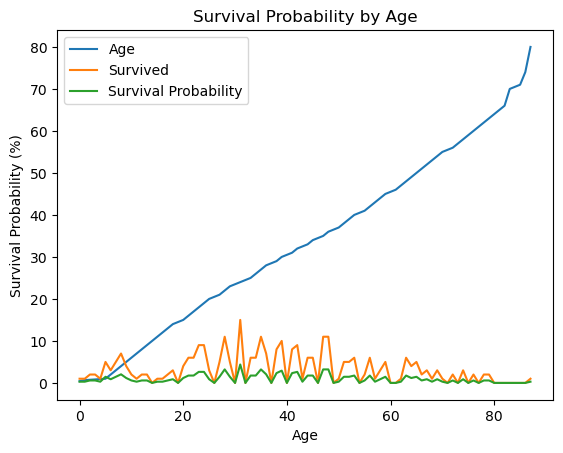

In [77]:
pivot_age.plot(kind="line")
plt.title('Survival Probability by Age')
plt.xlabel('Age')
plt.ylabel('Survival Probability (%)')
plt.show()

In [40]:
pivot_age.sum()

Survived                290.0
Survival Probability    100.0
dtype: float64

PROBABLITY FOR SURVIVAL BASED ON PASSENGER CLASS


In [52]:
pivot=df.pivot_table(index='Pclass',values='Ticket',  aggfunc="count")
pivot

,Ticket
Pclass,
1,216
2,184
3,491


In [43]:
pivot_Pclass=df.pivot_table(index='Pclass', values='Survived',aggfunc='sum')
total_survived_age = pivot_Pclass['Survived'].sum()


In [81]:
pivot_Pclass['Survival Probability'] =(pivot_Pclass['Survived'] / total_survived_age)*100
pivot_Pclass = pivot_Pclass.reset_index()
pivot_Pclass

,Pclass,Survived,Survival Probability
0,1,136,39.766082
1,2,87,25.438596
2,3,119,34.795322


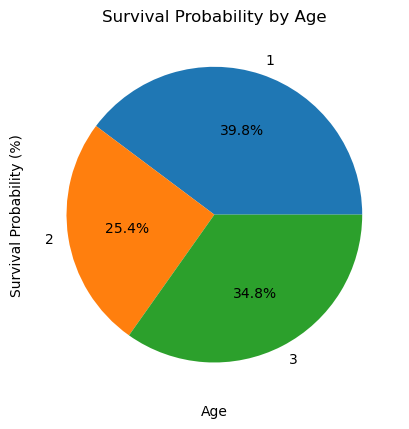

In [83]:
pivot_Pclass.set_index('Pclass')['Survival Probability'].plot(kind="pie", autopct='%1.1f%%', legend=False)
plt.title('Survival Probability by Age')
plt.xlabel('Age')
plt.ylabel('Survival Probability (%)')
plt.show()